# [**Réduction de la dimensionnalité avec l'analyse des composantes du voisinage**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/1_6_neighbors/plot_nca_dim_reduction.ipynb)<br/>([_Dimensionality Reduction with Neighborhood Components Analysis_](https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html))

Exemple d'utilisation de l'Analyse des Composantes du Voisinage (NCA) pour la réduction de la dimensionnalité.

Cet exemple compare différentes méthodes de réduction de la dimensionnalité (linéaire) appliquées à l'ensemble de données Digits. Cet ensemble de données contient des images de chiffres de 0 à 9, avec environ 180 échantillons de chaque classe. Chaque image est de dimension 8x8, soit 64, et est réduite à un point de données bidimensionnel.

L'Analyse en Composantes Principales (PCA) appliquée à ces données identifie la combinaison d'attributs (composantes principales ou directions dans l'espace des caractéristiques) qui explique la plus grande variance dans les données. Ici, nous représentons les différents échantillons sur les 2 premières composantes principales.

L'Analyse Discriminante Linéaire (LDA) vise à identifier les attributs qui expliquent la plus grande variance **entre les classes**. En particulier, contrairement au PCA, le LDA est une méthode supervisée qui utilise les étiquettes de classe connues.

L'Analyse des Composantes du Voisinage (NCA) tente de trouver un espace des caractéristiques tel qu'un algorithme stochastique de plus proche voisin donnera la meilleure précision. Comme le LDA, il s'agit d'une méthode supervisée.

On peut voir que l'Analyse des Composantes du Voisinage (NCA) impose un regroupement des données qui a une signification visuelle malgré la grande réduction de dimension.

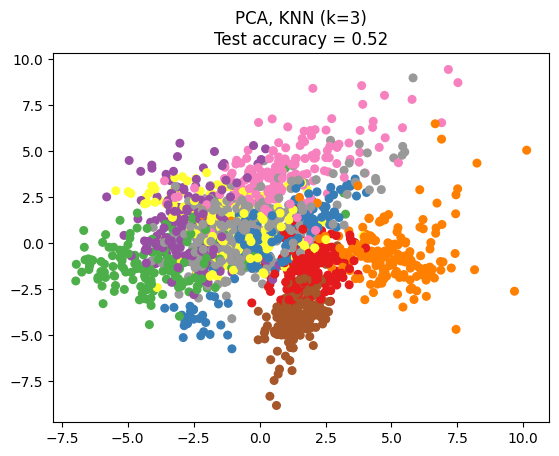

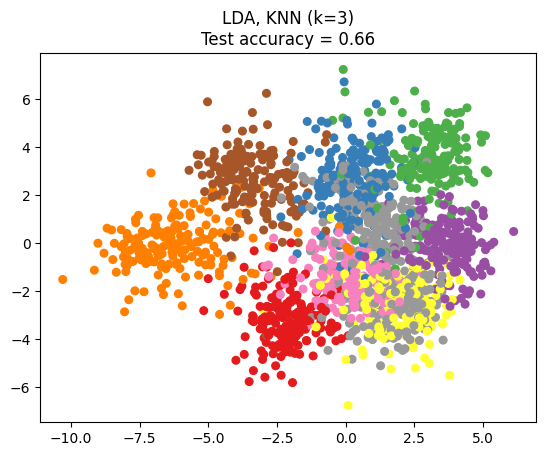

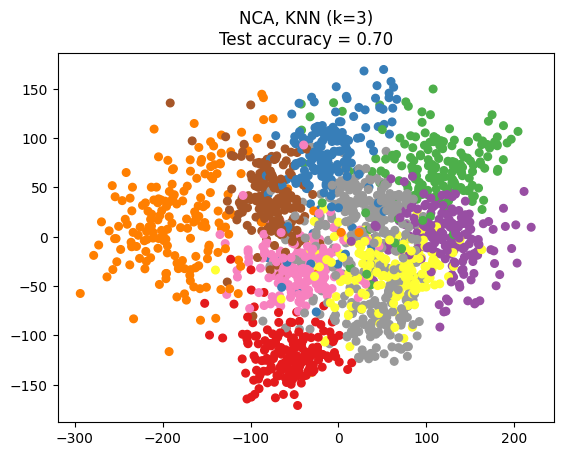

In [1]:
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_neighbors = 3
random_state = 0

# Load Digits dataset
X, y = datasets.load_digits(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=random_state
)

dim = len(X[0])
n_classes = len(np.unique(y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(
    StandardScaler(),
    NeighborhoodComponentsAnalysis(n_components=2, random_state=random_state),
)

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [("PCA", pca), ("LDA", lda), ("NCA", nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap="Set1")
    plt.title(
        "{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, n_neighbors, acc_knn)
    )
plt.show()